In [ ]:
import pandas as pd


df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville.csv')



print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [ ]:

print("Dataset Shape:", df.shape)

print("Columns:", df.columns)

print("Missing Values per Column:")
print(df.isna().sum())

Dataset Shape: (525600, 19)
Columns: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
threshold = len(df) * 0.05
missing_cols = [col for col in df.columns if df[col].isna().sum() > threshold]
print("Columns with >5% nulls:", missing_cols)

Columns with >5% nulls: ['Comments']


In [7]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[col] = df[col].fillna(df[col].median())
print("Missing Values after Imputation:")

Missing Values after Imputation:


In [8]:
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [9]:
# Check for missing values in all columns
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Identify columns with significant missing data (>5%)
threshold = len(df) * 0.05  # 5% threshold
columns_with_missing = missing_values[missing_values > threshold]
print("\nColumns with >5% Missing Values:")
print(columns_with_missing)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
Comments    525600
dtype: int64


In [10]:
# Drop rows with missing values in critical columns
critical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_cleaned = df.dropna(subset=critical_columns)

# Impute missing values in other columns with the median
for col in df.columns:
    if col not in critical_columns and df[col].isna().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Verify that missing values are handled
print("Missing Values After Cleaning:")
print(df_cleaned.isna().sum())

Missing Values After Cleaning:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\dagi\AppData\Local\Temp\ipykernel_2260\3017022641.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [11]:
# Drop rows with missing values in critical columns
critical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_cleaned = df.dropna(subset=critical_columns).copy()

# Impute missing values in non-critical columns with the median
for col in df_cleaned.columns:
    if col not in critical_columns and df_cleaned[col].isna().sum() > 0:
        median_value = df_cleaned[col].median()
        if not pd.isna(median_value):  # Avoid using median of empty column
            df_cleaned[col] = df_cleaned[col].fillna(median_value)

# Verify that missing values are handled
print("Missing Values After Cleaning:")
print(df_cleaned.isna().sum())


Missing Values After Cleaning:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of Outlier Rows: 7740
Dataset Shape After Removing Outliers: (525600, 19)
Dataset Shape After Removing Outliers: (517860, 19)


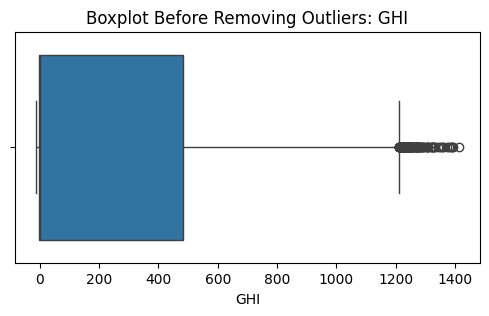

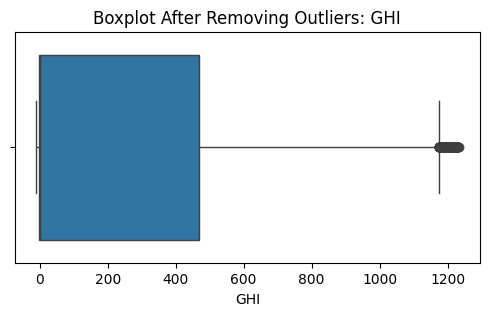

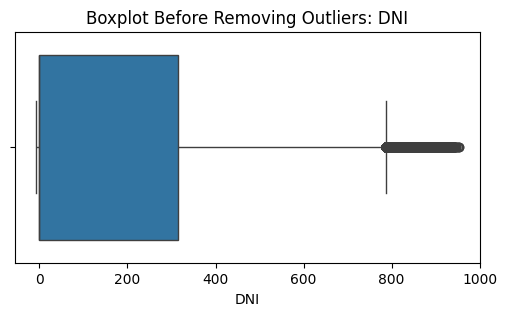

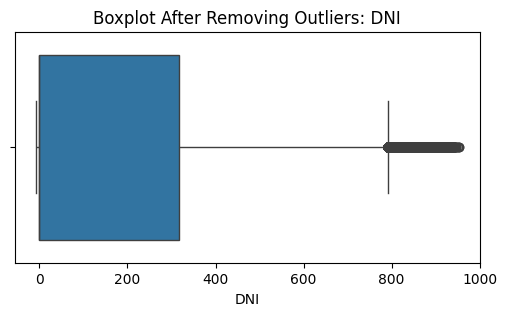

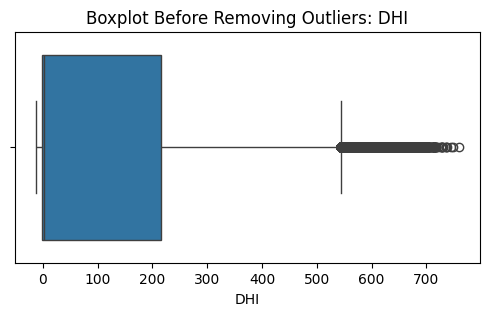

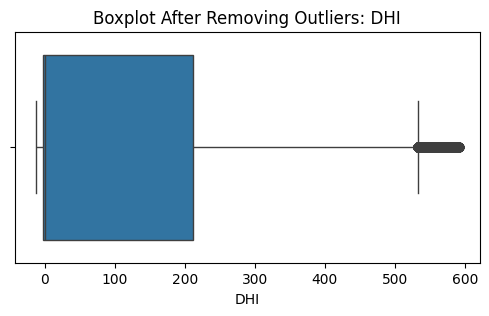

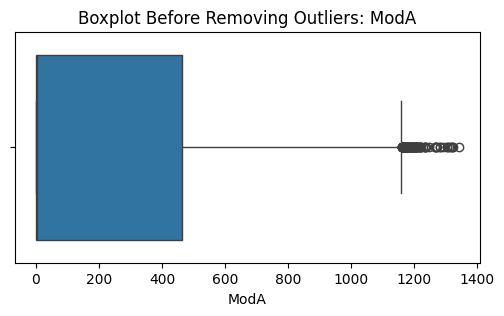

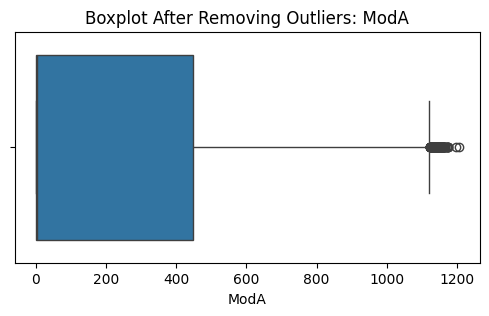

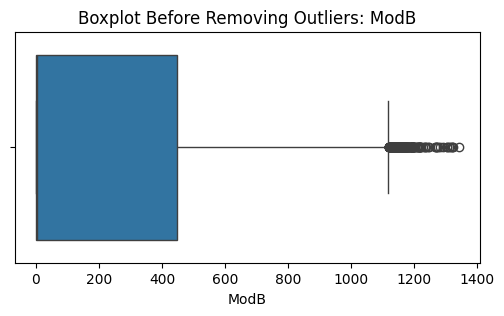

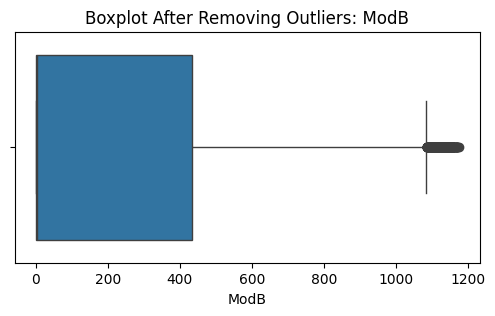

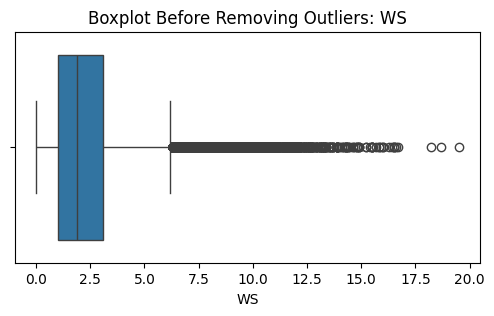

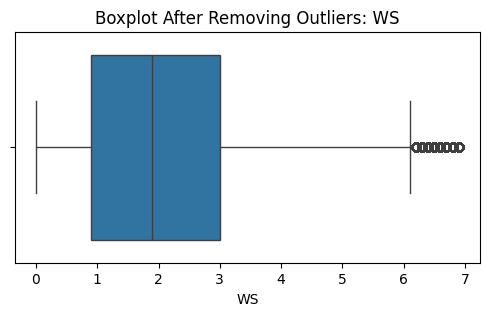

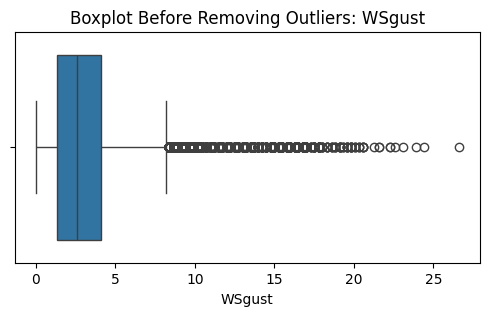

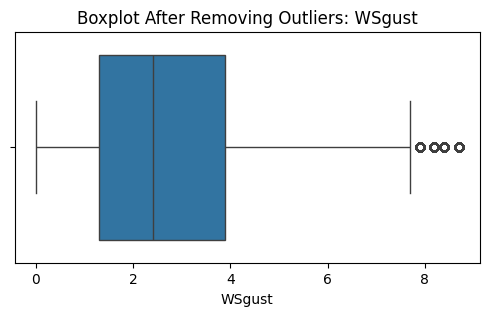

In [19]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Step 1: Check for outliers using Z-scores
z_scores = df_cleaned[numeric_columns].apply(zscore)


# Step 4: Create a boolean mask for outliers
outliers = (z_scores.abs() > 3).any(axis=1)

# Explanation:
# - z_scores.abs() > 3 gives True wherever |Z| > 3
# - .any(axis=1) checks if **any** column in that row is an outlier
# - So, outliers is a boolean Series: True = row has at least one outlier

# Step 5: Print how many outlier rows there are
print("Number of Outlier Rows:", outliers.sum())

# Step 6: Remove the outliers
df_no_outliers = df_cleaned[~outliers]

# Explanation:
# - `~outliers` means NOT outliers, i.e., we keep rows that are not flagged
# - df_no_outliers is your cleaned dataset without extreme values

# Step 7: Show the shape after cleaning
print("Dataset Shape before Removing Outliers:", df.shape)
print("Dataset Shape After Removing Outliers:", df_no_outliers.shape)

# Step 8: Optional — Visualize outliers using boxplots
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot Before Removing Outliers: {col}')
    plt.show()

    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot After Removing Outliers: {col}')
    plt.show()


In [20]:
# Check for negative or unrealistic values in key columns
invalid_entries = {
    'Negative GHI': (df_cleaned['GHI'] < 0).sum(),
    'Negative DNI': (df_cleaned['DNI'] < 0).sum(),
    'Negative DHI': (df_cleaned['DHI'] < 0).sum(),
    'Negative WS': (df_cleaned['WS'] < 0).sum(),
    'Negative WSgust': (df_cleaned['WSgust'] < 0).sum(),
}

print("Invalid Entries:")
for key, value in invalid_entries.items():
    print(f"{key}: {value}")

# Remove rows with invalid entries
df_cleaned = df_cleaned[(df_cleaned['GHI'] >= 0) & 
                        (df_cleaned['DNI'] >= 0) & 
                        (df_cleaned['DHI'] >= 0) & 
                        (df_cleaned['WS'] >= 0) & 
                        (df_cleaned['WSgust'] >= 0)]

# Verify the cleaned dataset
print("Dataset Shape After Removing Invalid Entries:", df_cleaned.shape)

Invalid Entries:
Negative GHI: 258847
Negative DNI: 275987
Negative DHI: 259182
Negative WS: 0
Negative WSgust: 0
Dataset Shape After Removing Invalid Entries: (246878, 19)


In [9]:
df_cleaned.to_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malamville_clean.csv', index=False)


NameError: name 'df_cleaned' is not defined

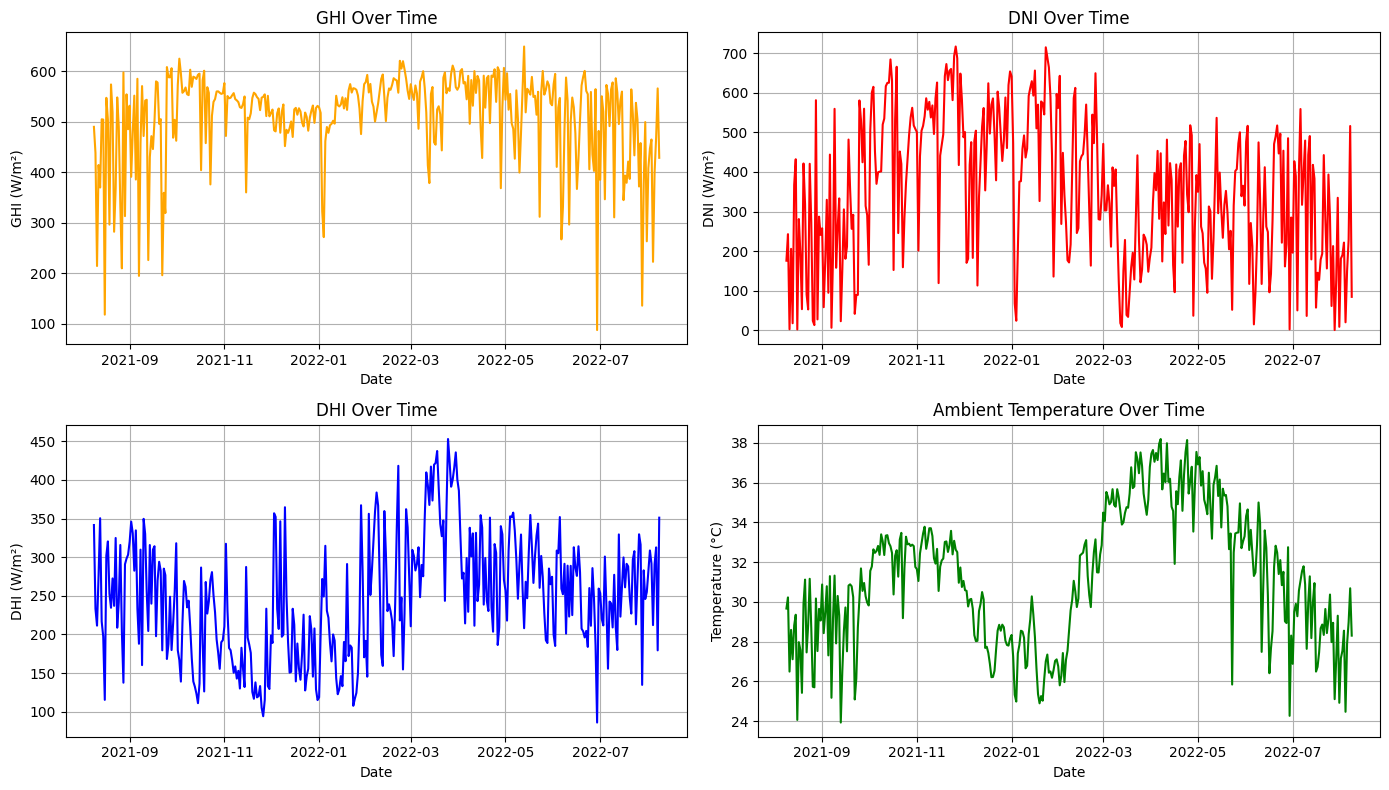

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset for the respective country
df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')  # Replace <country> with 'benin', 'sierraleone', or 'togo'

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index
df.set_index('Timestamp', inplace=True)

# Resample data to daily averages for smoother visualization
df_daily = df.resample('D').mean()

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))

# GHI
plt.subplot(2, 2, 1)
plt.plot(df_daily.index, df_daily['GHI'], label='GHI', color='orange')
plt.title('GHI Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.grid()

# DNI
plt.subplot(2, 2, 2)
plt.plot(df_daily.index, df_daily['DNI'], label='DNI', color='red')
plt.title('DNI Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.grid()

# DHI
plt.subplot(2, 2, 3)
plt.plot(df_daily.index, df_daily['DHI'], label='DHI', color='blue')
plt.title('DHI Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')
plt.grid()

# Tamb
plt.subplot(2, 2, 4)
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb', color='green')
plt.title('Ambient Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.tight_layout()
plt.show()

Average ModA & ModB Pre/Post-Clean:
                ModA        ModB
Cleaning                        
0         502.154853  485.776310
1         308.255694  302.947826


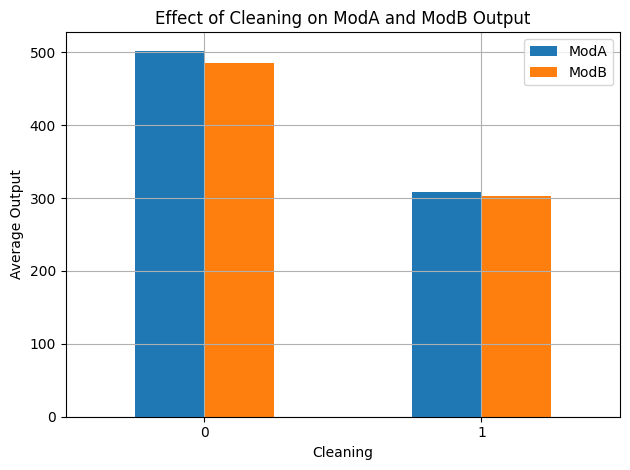

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')  

# Group by Cleaning flag and calculate mean
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA & ModB Pre/Post-Clean:")
print(cleaning_impact)

cleaning_impact.plot(kind='bar', title='Effect of Cleaning on ModA and ModB Output')
plt.ylabel('Average Output')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



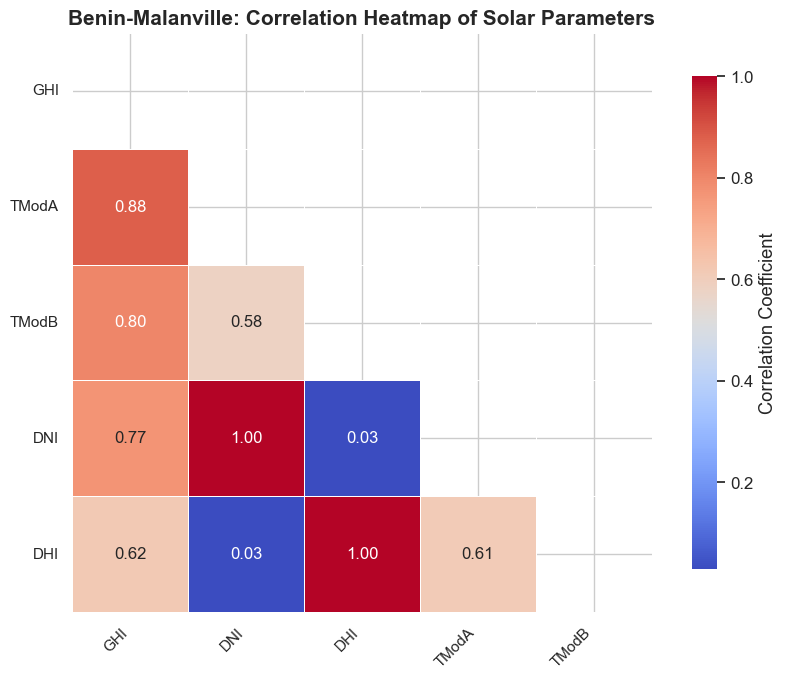

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data
df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')  

# Define relevant numeric columns
numeric_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute the correlation matrix (rounded for clean visuals)
corr_matrix = df[numeric_columns].corr().round(2)

# Optional: Sort matrix by GHI correlation strength
corr_matrix = corr_matrix.reindex(corr_matrix['GHI'].abs().sort_values(ascending=False).index)
corr_matrix = corr_matrix.loc[corr_matrix.index]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the plot
plt.figure(figsize=(9, 7))
sns.set(style="whitegrid", font_scale=1.1)

# Create the heatmap
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={
        "label": "Correlation Coefficient",
        "shrink": 0.85
    },
    annot_kws={"size": 12}
)

# Improve plot aesthetics
plt.title('Benin-Malanville: Correlation Heatmap of Solar Parameters', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()

# Show plot
plt.show()


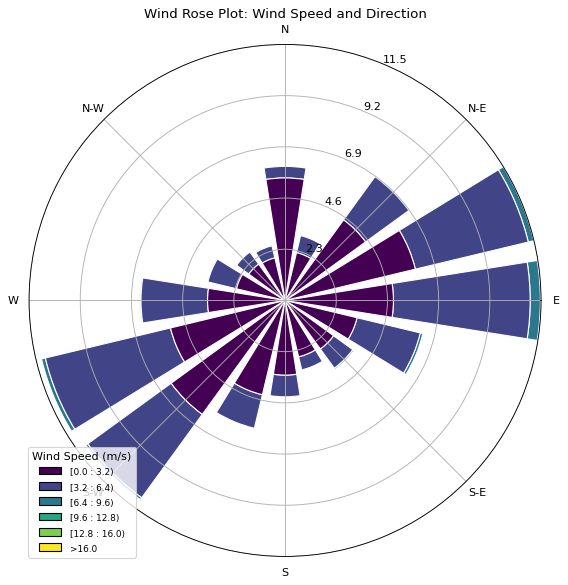

In [10]:
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')

# Create a wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)", loc='lower left')
plt.title('Wind Rose Plot: Wind Speed and Direction')
plt.show()

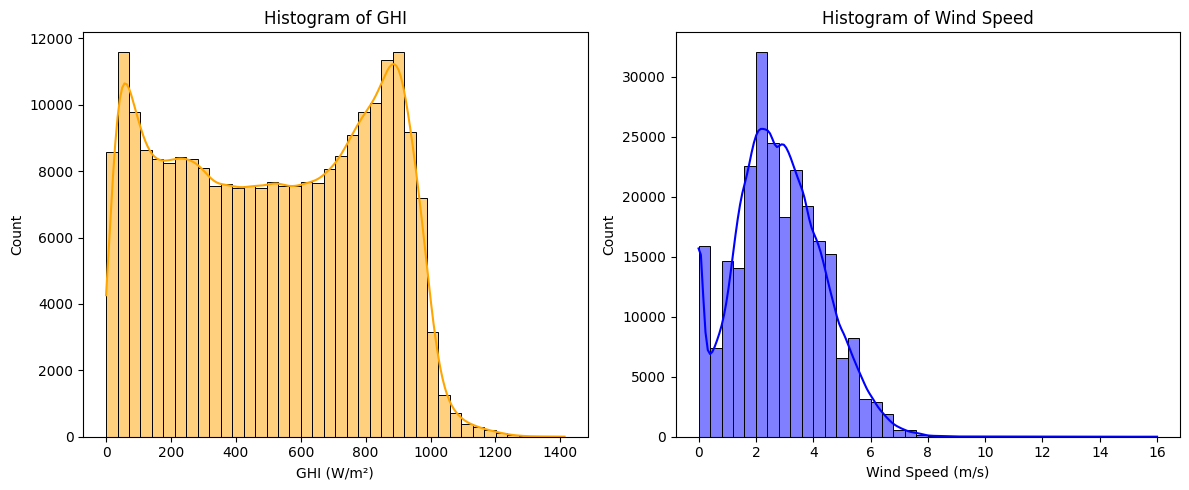

In [12]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=40, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Histogram of GHI")
axes[0].set_xlabel("GHI (W/m²)")

sns.histplot(df['WS'], bins=40, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Histogram of Wind Speed")
axes[1].set_xlabel("Wind Speed (m/s)")

plt.tight_layout()
plt.show()

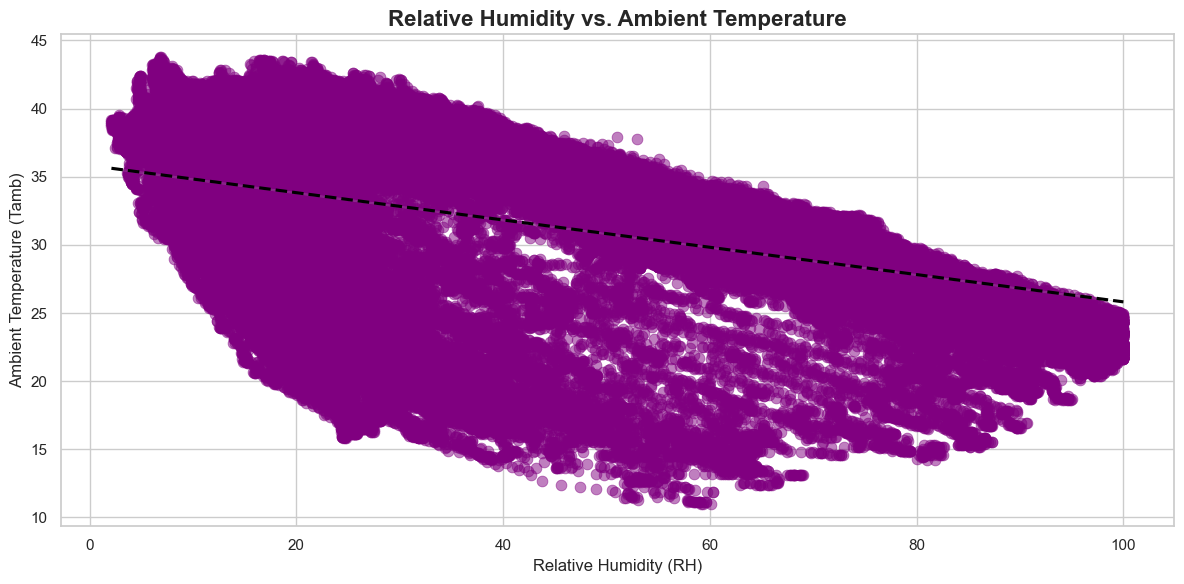

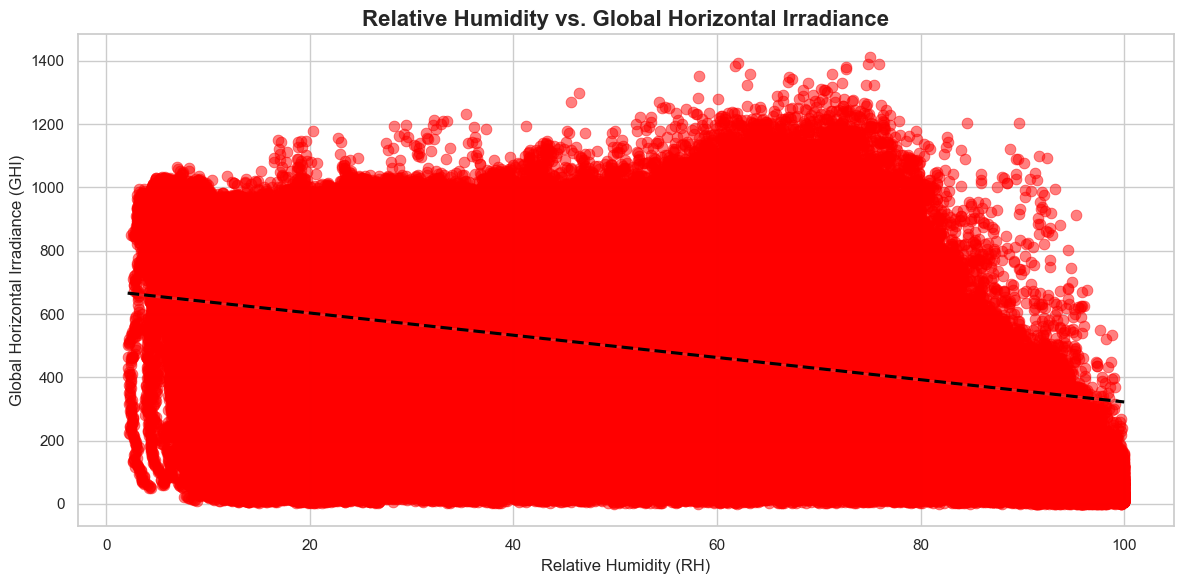

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')

# Set plot style
sns.set(style="whitegrid", context="notebook")

# RH vs. Tamb with regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RH', y='Tamb', color='purple', alpha=0.5, s=60, edgecolor=None)
sns.regplot(data=df, x='RH', y='Tamb', scatter=False, color='black', line_kws={"linestyle": "dashed"})
plt.title('Relative Humidity vs. Ambient Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Relative Humidity (RH)', fontsize=12)
plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)
plt.tight_layout()
plt.show()

# RH vs. GHI with regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RH', y='GHI', color='red', alpha=0.5, s=60, edgecolor=None)
sns.regplot(data=df, x='RH', y='GHI', scatter=False, color='black', line_kws={"linestyle": "dashed"})
plt.title('Relative Humidity vs. Global Horizontal Irradiance', fontsize=16, fontweight='bold')
plt.xlabel('Relative Humidity (RH)', fontsize=12)
plt.ylabel('Global Horizontal Irradiance (GHI)', fontsize=12)
plt.tight_layout()
plt.show()


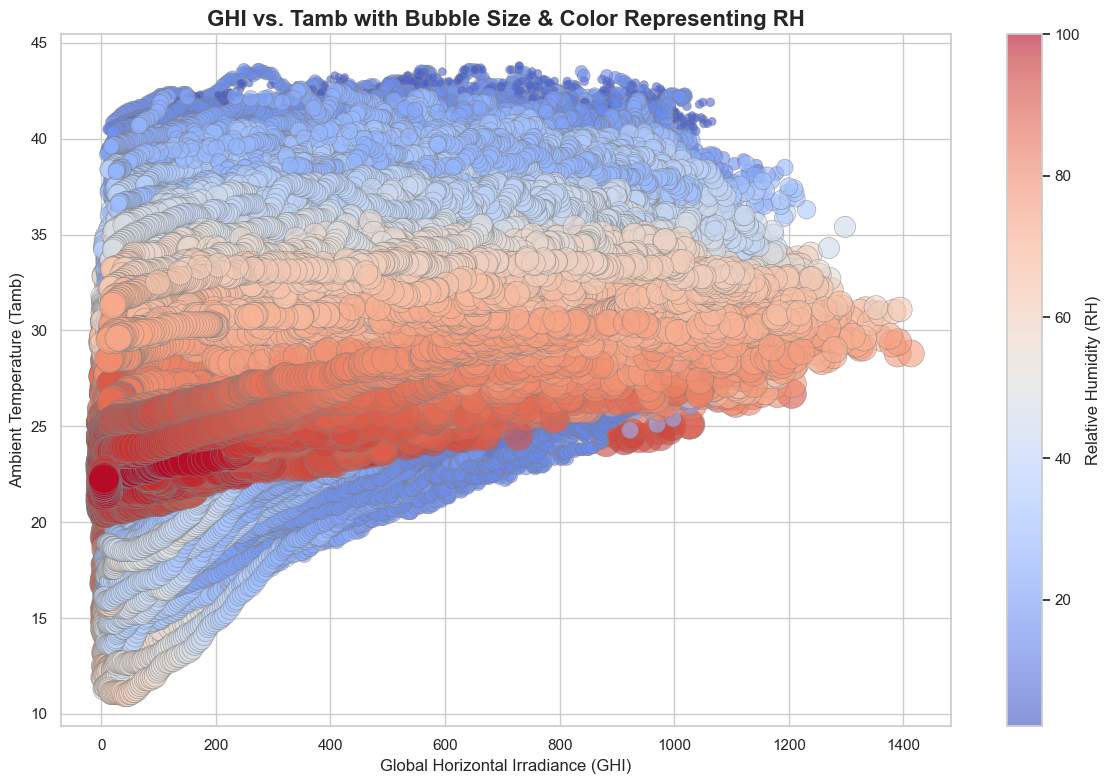

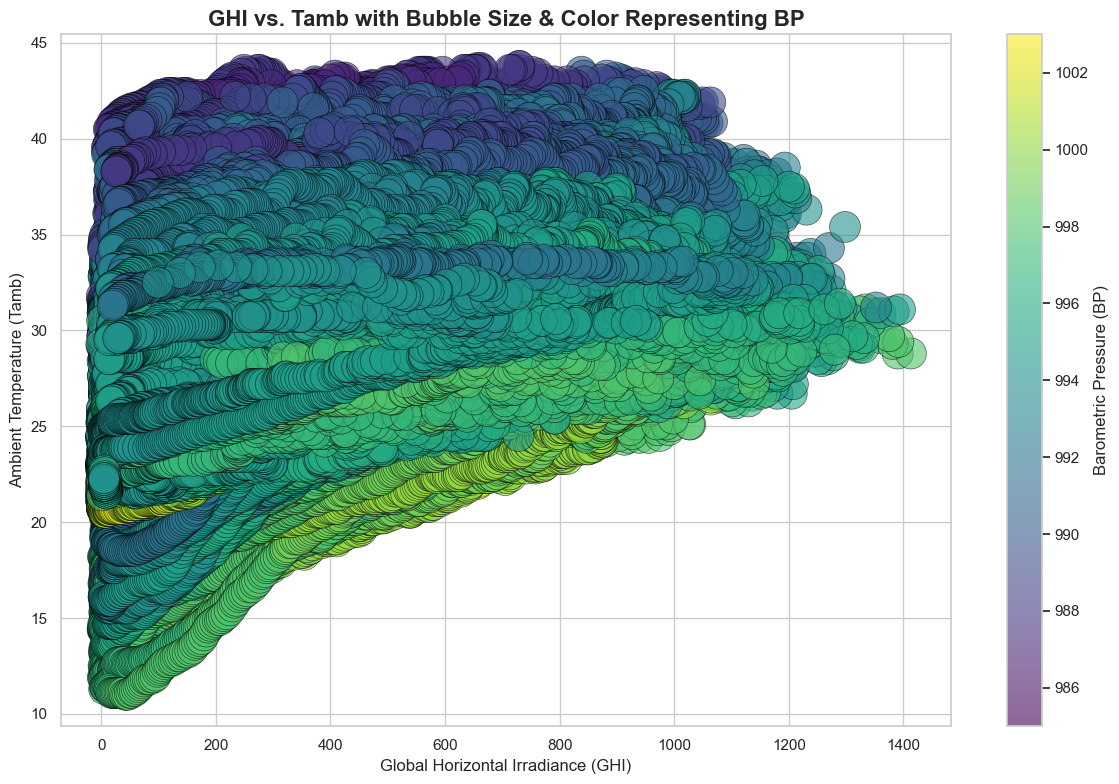

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\benin-malanville_clean.csv')

# Set plot style
sns.set(style="whitegrid", context="notebook")

# Bubble Chart: GHI vs. Tamb with bubble size = RH
plt.figure(figsize=(12, 8))
bubble1 = plt.scatter(
    df['GHI'], 
    df['Tamb'], 
    s=df['RH'] * 5,               # Scale size of bubbles
    c=df['RH'], 
    cmap='coolwarm', 
    alpha=0.6, 
    edgecolors='gray', 
    linewidths=0.5
)
cbar = plt.colorbar(bubble1)
cbar.set_label('Relative Humidity (RH)', fontsize=12)
plt.title('GHI vs. Tamb with Bubble Size & Color Representing RH', fontsize=16, fontweight='bold')
plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bubble Chart: GHI vs. Tamb with bubble size = BP
plt.figure(figsize=(12, 8))
bubble2 = plt.scatter(
    df['GHI'], 
    df['Tamb'], 
    s=df['BP'] * 0.5,             # Scale size of bubbles
    c=df['BP'], 
    cmap='viridis', 
    alpha=0.6, 
    edgecolors='black', 
    linewidths=0.5
)
cbar = plt.colorbar(bubble2)
cbar.set_label('Barometric Pressure (BP)', fontsize=12)
plt.title('GHI vs. Tamb with Bubble Size & Color Representing BP', fontsize=16, fontweight='bold')
plt.xlabel('Global Horizontal Irradiance (GHI)', fontsize=12)
plt.ylabel('Ambient Temperature (Tamb)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
